Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

ModuleNotFoundError: No module named 'xgboost'

Importing Dataset


In [ ]:
hp_dataset = sklearn.datasets.fetch_california_housing()

In [12]:
print(hp_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

Adding dataframe to dataset data and naming the columns

In [4]:
hp_dataframe = pd.DataFrame(hp_dataset.data, columns = hp_dataset.feature_names)

NameError: name 'hp_dataset' is not defined

In [2]:
hp_dataframe.head()

NameError: name 'hp_dataframe' is not defined

In [21]:
hp_dataframe['Price'] = hp_dataset.target

In [29]:
hp_dataframe.drop(['price'], axis = 1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Checking the size of dataframe



In [32]:
hp_dataframe.shape

(20640, 10)

Checking for missing values




In [33]:
hp_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
Price         0
dtype: int64

Statistical Measures of the dataset




In [34]:
hp_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010,5.000010


UNDERSTANDING THE CORRELATION BETWEEN VARIOUS FEATURES IN THE DATASET





1. Positive Correlation

2. Negative Correlation

In [35]:
correlation = hp_dataframe.corr()

Constructing HeapMap to understand the correlation

In [41]:
plt.figure(figsize=(10,10))


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Axes: >

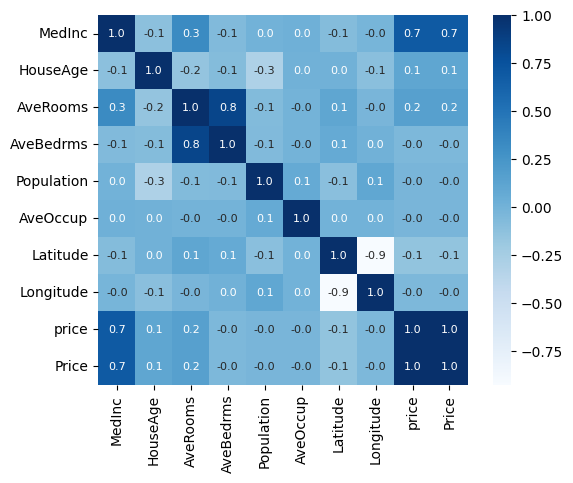

In [44]:
sns.heatmap(correlation, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Splitting the data and Target




In [53]:
X = hp_dataframe.drop(['Price','price'], axis = 1)

Y = hp_dataframe['Price'] 

In [54]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

Splitting the data into Trainning data and Test data

In [62]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 2)

In [61]:
print(X.shape, X_train.shape , X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


Model Training

XGBoost Regressor

Loading the Model

In [59]:
model = XGBRegressor()

In [63]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

Prediction on training data

In [65]:
training_pred = model.predict(X_train)

R Squared Eroor



In [66]:
score1 = metrics.r2_score(Y_train,training_pred)

Mean Absolute Error



In [67]:
score2 = metrics.mean_absolute_error(Y_train ,training_pred)

In [68]:
print("R Squared Error is" , score1)

R Squared Error is 0.943650140819218


In [69]:
print("Mean Square Error is ", score2)

Mean Square Error is  0.1933648700612105


Prediction on Test Data




In [70]:
training_pred2 = model.predict(X_test)

In [71]:

score1 = metrics.r2_score(Y_test,training_pred2)
score2 = metrics.mean_absolute_error(Y_test ,training_pred2)
print("R Squared Error is" , score1)
print("Mean Square Error is ", score2)

R Squared Error is 0.8338000331788725
Mean Square Error is  0.3108631800268186


Visualizing the actual prices and predicted prices

<function matplotlib.pyplot.show(close=None, block=None)>

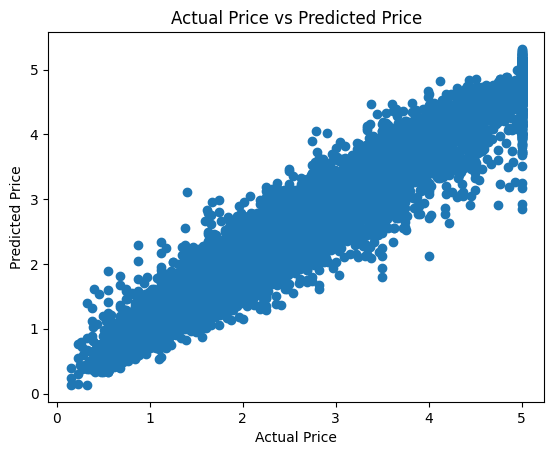

In [72]:
plt.scatter(Y_train, training_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show